 # Earnings Based on College Majors
 We are going to work with a dataset on job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conduts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
 Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median, salaries, and more. Here are some of the columns in the dataset:
 * Rank - Rank by median earnings (the dataset is ordered by this column)
 * Major_code - Major code
 * Major - Major description
 * Major_category - Category of major
 * Total - Total number of people with major
 * Sample_size - Sample size (unweighted) of full-time
 * Men - Male graduates
 * Women - Female graduates
 * ShareWomen - Women as share of total
 * Employed - Number employed
 * Median - Median salary of full-time, year-round workers
 * Low_wage_jobs - Number in low-wage service jobs
 * Full_time - Number employed 35 hours or more
 * Part_time - Number employed less than 35 hours


 In this project, we are going to explore which majors make more money after graduation.
 Plus, we would like to know whether majors are prodominantly male or female.
 Lastly, we will find out which majors have the most students.

 # Earnings Based on College Majors
 We are going to work with a dataset on job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conduts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).
 Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median, salaries, and more. Here are some of the columns in the dataset:
 * Rank - Rank by median earnings (the dataset is ordered by this column)
 * Major_code - Major code
 * Major - Major description
 * Major_category - Category of major
 * Total - Total number of people with major
 * Sample_size - Sample size (unweighted) of full-time
 * Men - Male graduates
 * Women - Female graduates
 * ShareWomen - Women as share of total
 * Employed - Number employed
 * Median - Median salary of full-time, year-round workers
 * Low_wage_jobs - Number in low-wage service jobs
 * Full_time - Number employed 35 hours or more
 * Part_time - Number employed less than 35 hours


 In this project, we are going to explore which majors make more money after graduation.
 Plus, we would like to know whether majors are prodominantly male or female.
 Lastly, we will find out which majors have the most students.

 # Visuallizing Data
 We will visualize the data using histograms, scatter plots and bar plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
recent_grads = pd.read_csv("/Users/kevinmtaing/Documents/python_vscode/Visualizing-Grade-by-Majors/recent-grads.csv", )
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads = recent_grads.dropna()


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

 We find some columns have some missing data. In order to have a better estimate, we will drop out all *NA* value because it is meaningless and affects on the plots (outliers).

 # Exploring the Salary and the Unemployment Rate after Graduation by Majors
 We are going to use the scatter plot to explore the matter by using the scatter plots from *Pandas*.

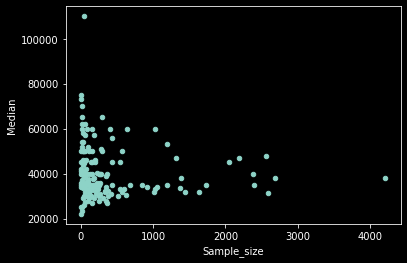

In [2]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')


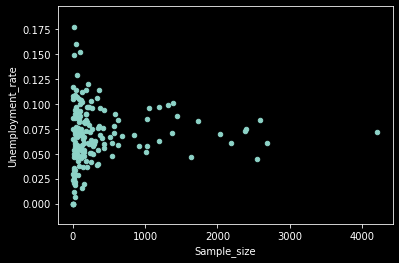

In [3]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')


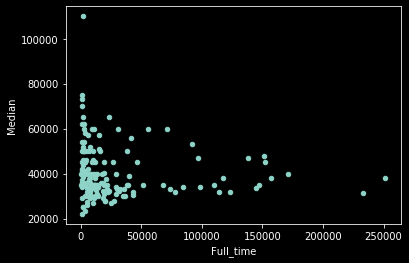

In [4]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')


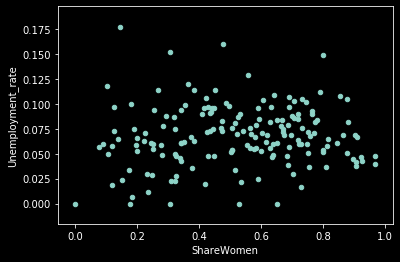

In [5]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')


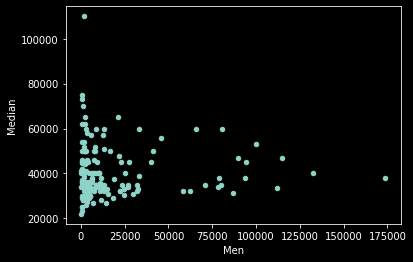

In [6]:
recent_grads.plot(x='Men', y='Median', kind='scatter')


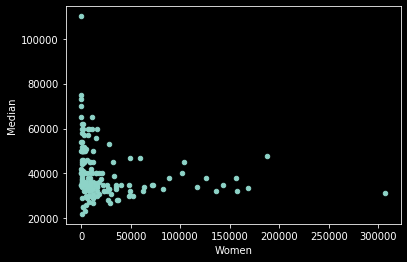

In [7]:
recent_grads.plot(x='Women', y='Median', kind='scatter')


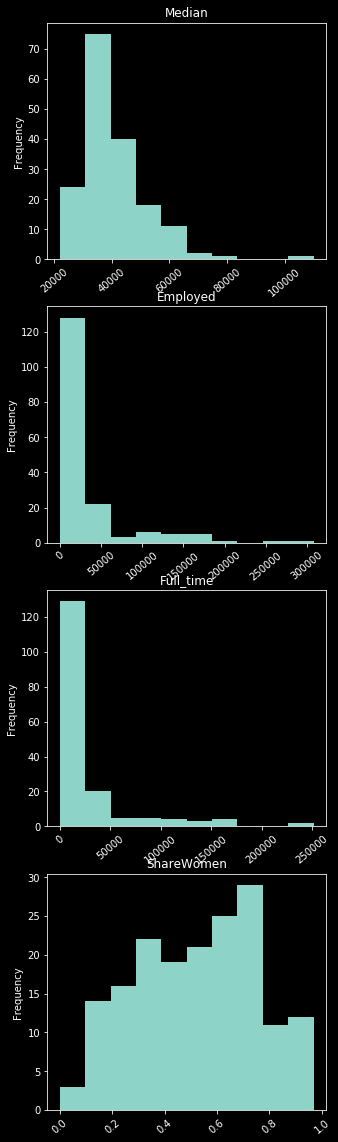

In [8]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,20))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_title(cols[r])


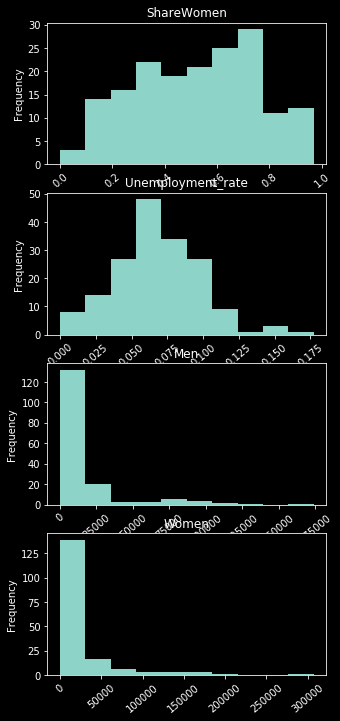

In [9]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_title(cols[r])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11df36f10>,
      dtype=object)

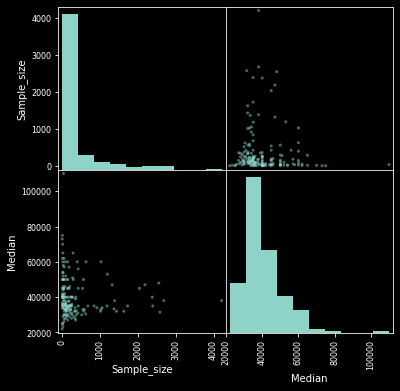

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e24b350>,
      dtype=object)

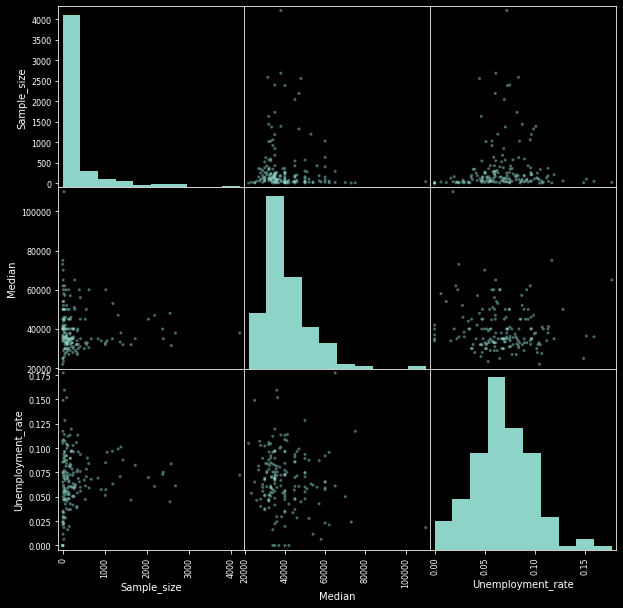

In [11]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))


 From all above scatter plots, we find that the present of the outliers is still exist in the plots, which makes a difficulty conclusion. Therefore, we can conclude that there is no linear relationship between them. Still, through the scatter plot between *Unemployment_rate* and *ShareWomen*, we can conclude there is no correlation relationship between them.

 # Exploring Which Majors are prodominently Male or Female
 For this matter, we will use the histogram and scatter matrix plot to answer because it is easy to visualize the matter. Since there are many majors to be counted, we will only visual the top 10 majors which are whether prodominenty male or female.

In [12]:
data = recent_grads[["Major","ShareWomen"]]
data = data.sort_values(by="ShareWomen")
data["ShareMen"] = 1 - data["ShareWomen"]


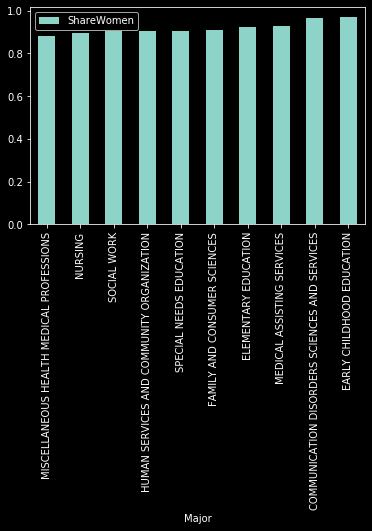

In [13]:
data.tail(10).plot.bar(x='Major', y='ShareWomen')


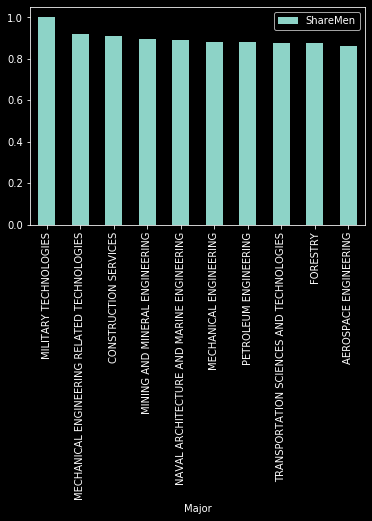

In [14]:
data[:10].plot.bar(x='Major', y='ShareMen')


 We can see that the proportion of Women in the major of *Early Childhood Education* and *COmmunication Disorders Sciences and Services* have nearly 100%. With the histogram, we observe that most majors that are prominently female are related to family education and health industry. Regarding the majors that are prominently male, *Military Technology* stays at top, which is nearly 100% of male. Those majors are mostly related to technology and engineering.

 # Students by Major
 Lastly, we will employ the bar plot to show the number of students by each major.

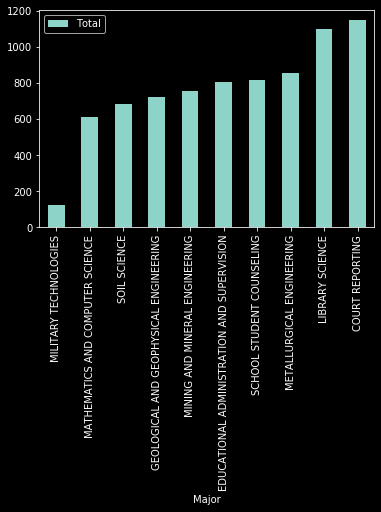

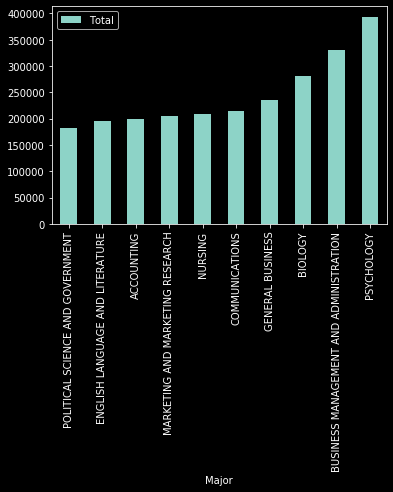

In [15]:
data1 = recent_grads[["Major","Total"]]
data1 = data1.sort_values(by="Total")
data1[:10].plot.bar(x="Major", y="Total")
data1.tail(10).plot.bar(x="Major", y="Total")


 Through the histogram, the top 10 majors where have the most students enrolled are listed in the graph. *Psychology* major has the most students, where *Military Technologies* major has the least students.